# CART分析
決定木は基本的な機械学習アルゴリズムの一つで、一つ一つの項目で目的変数の予測を行う。その特性上予測をするまでの過程がある。予測の過程を見ることができれば結果に対する因果関係の説明ができる。

# ライブラリのインポート

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
#from sklearn.tree import DecisionTreeRegressor as DTR  連続値が目的変数の場合はこっち
from sklearn.tree import export_graphviz as EG
from pydotplus import graph_from_dot_data as GFDD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データの読み込みおとび目的変数と説明変数の分離

In [ ]:
df = pd.read_csv("wine.csv")
y_name = "Wine"
y = df[y_name].values
x_table = df.drop(y_name, axis=1)
x_name = x_table.columns
x = x_table.values

# モデルの宣言と学習および重要度の算出

In [ ]:
model = DTC()
model.fit(x, y)
imp = model.feature_importances_
dfi = pd.DataFrame(imp)
dfi.index = x_name
dfi.columns = ["result"]
dfi = dfi.sort_values("result", ascending=False)
dfi

,result
Proline,0.382470
OD,0.312043
Flavanoids,0.141447
Hue,0.058185
Alcohol,0.033052
Mg,0.032978
Malic.acid,0.025602
Color.int,0.014223
Ash,0.000000
Acl,0.000000


# 予測過程の出力

In [ ]:
class_name = list(set(y))
for i in range(len(class_name)):
    class_name[i] = str(class_name[i])
dotdata = EG(model, filled=True, rounded=True, class_names=class_name, feature_names=x_name, out_file=None)
graph = GFDD(dotdata)
graph.write_png("CART.png")

True

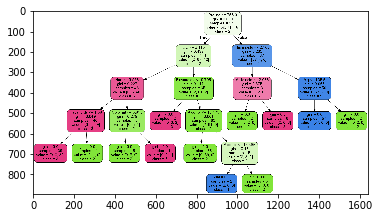

In [ ]:
import cv2
img = cv2.imread("CART.png")
plt.imshow(img)
plt.show()

# 項目ごとの分布を可視化

In [ ]:
result = []
for i in range(len(y)):
    for col in dfi.index:
        result.append([col, int(y[i]), df[col].values[i]])
dfr = pd.DataFrame(result)
dfr.columns = ["name","y","x"]
cname = list(set(y))
for col in dfi.index:
    res = dfr.query("name==\""+col+"\"")
    plt.title(col)
    re = []
    for name in cname:
        re.append(res.query("y=="+str(name))["x"].values)
    plt.boxplot(re, labels=cname, positions=cname)
    plt.scatter(res["y"].values, res["x"].values, cmap="brg_r", c=res["y"], marker="_")
    plt.savefig(col+".png")
    plt.clf()

C:\Users\decar\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1395: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 432x288 with 0 Axes>